In [1]:
import numpy as np
import glob
import dill
from tqdm import tqdm
from utils import MinMaxScaler, StandardScaler, make_dir, sort_fn, save_object
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_paths = sorted(glob.glob("../data/SPCAM5/inputs_*"), key=sort_fn)
y_paths = sorted(glob.glob("../data/SPCAM5/outputs_*"), key=sort_fn)

In [14]:
dataset = 1

if dataset == 1:
    n = 183 # first dataset: 6 monnths
    train_x = x_paths[:int(n*0.8)]
    train_y = y_paths[:int(n*0.8)]
    val_x = x_paths[int(n*0.8): n]
    val_y = y_paths[int(n*0.8): n]
    test_x = x_paths[n:365]
    test_y = y_paths[n:365]
else:
    n = 365 # second dataset: 1 year
    train_x = x_paths[:int(n*0.8)]
    train_y = y_paths[:int(n*0.8)]
    val_x = x_paths[int(n*0.8): n]
    val_y = y_paths[int(n*0.8): n]
    test_x = x_paths[n:]
    test_y = y_paths[n:]

In [15]:
x_max = np.load(f"metrics/dataset_{dataset}_x_max.npy")
y_max = np.load(f"metrics/dataset_{dataset}_y_max.npy")
x_scaler_minmax = dill.load(open(f"metrics/dataset_{dataset}_x_scaler_minmax.pkl", "rb"))
y_scaler_minmax = dill.load(open(f"metrics/dataset_{dataset}_y_scaler_minmax.pkl", "rb"))
x_scaler_standard = dill.load(open(f"metrics/dataset_{dataset}_x_scaler_standard.pkl", "rb"))
y_scaler_standard = dill.load(open(f"metrics/dataset_{dataset}_y_scaler_standard.pkl", "rb"))

In [19]:
# plot maximum devaition

def get_deviation(x_paths=None, y_paths=None, scaler=None):
    max_deviation = None
    min_deviation = None
    if x_paths is not None:
        paths = x_paths
    else:
        paths = y_paths
    for path in tqdm(paths):
        if x_paths is not None:
            data = np.load(path, mmap_mode="r")
            if scaler is None:
                data = data / x_max
            else:
                data = scaler.transform(data)
        else:
            data = np.load(path, mmap_mode="r")[:, :26]
            if scaler is None:
                data = data / y_max
            else:
                data = scaler.transform(data)

        abs_max = np.max(data, axis=0)
        abs_min = np.min(data, axis=0)

        if max_deviation is None:
            max_deviation = abs_max
            min_deviation = abs_min
            continue
        max_deviation = np.max(np.vstack([max_deviation, abs_max]), axis=0)
        min_deviation = np.min(np.vstack([min_deviation, abs_min]), axis=0)
    return max_deviation, min_deviation

def plot_deviation(min, max, title):
    plt.bar(np.arange(min.shape[-1]), min, alpha=0.5, label="min")
    plt.bar(np.arange(max.shape[-1]), max, alpha=0.5, label="max")
    plt.legend()
    plt.title(title)
    plt.savefig("plots/" + title+".jpg")
    plt.show()

In [21]:
train_minmax_max_deviation, train_minmax_min_deviation = get_deviation(y_paths=train_y, scaler=y_scaler_minmax)
val_minmax_max_deviation, val_minmax_min_deviation = get_deviation(y_paths=val_y, scaler=y_scaler_minmax)
test_minmax_max_deviation, test_minmax_min_deviation = get_deviation(y_paths=test_y, scaler=y_scaler_minmax)
# plot_deviation(train_minmax_min_deviation, train_minmax_max_deviation, title=f"dataset_{dataset}_train_y_minmax_deviation")
# plot_deviation(val_minmax_min_deviation, val_minmax_max_deviation, title=f"dataset_{dataset}_val_y_minmax_deviation")
# plot_deviation(test_minmax_min_deviation, test_minmax_max_deviation, title=f"dataset_{dataset}_test_y_minmax_deviation")

np.save(f"deviations/dataset_{dataset}_train_y_minmax_max_deviation.npy", train_minmax_max_deviation)
np.save(f"deviations/dataset_{dataset}_train_y_minmax_min_deviation.npy", train_minmax_min_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_minmax_max_deviation.npy", val_minmax_max_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_minmax_min_deviation.npy", val_minmax_min_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_minmax_max_deviation.npy", test_minmax_max_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_minmax_min_deviation.npy", test_minmax_min_deviation)

train_standard_max_deviation, train_standard_min_deviation = get_deviation(y_paths=train_y, scaler=y_scaler_standard)
val_standard_max_deviation, val_standard_min_deviation = get_deviation(y_paths=val_y, scaler=y_scaler_standard)
test_standard_max_deviation, test_standard_min_deviation = get_deviation(y_paths=test_y, scaler=y_scaler_standard)
# plot_deviation(train_standard_min_deviation, train_standard_max_deviation, title=f"dataset_{dataset}_train_y_standard_deviation")
# plot_deviation(val_standard_min_deviation, val_standard_max_deviation, title=f"dataset_{dataset}_val_y_standard_deviation")
# plot_deviation(test_standard_min_deviation, test_standard_max_deviation, title=f"dataset_{dataset}_test_y_standard_deviation")

np.save(f"deviations/dataset_{dataset}_train_y_standard_max_deviation.npy", train_standard_max_deviation)
np.save(f"deviations/dataset_{dataset}_train_y_standard_min_deviation.npy", train_standard_min_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_standard_max_deviation.npy", val_standard_max_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_standard_min_deviation.npy", val_standard_min_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_standard_max_deviation.npy", test_standard_max_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_standard_min_deviation.npy", test_standard_min_deviation)

train_max_max_deviation, train_max_min_deviation = get_deviation(y_paths=train_y)
val_max_max_deviation, val_max_min_deviation = get_deviation(y_paths=val_y)
test_max_max_deviation, test_max_min_deviation = get_deviation(y_paths=test_y)

# plot_deviation(train_max_min_deviation, train_max_max_deviation, title=f"dataset_{dataset}_train_y_max_deviation")
# plot_deviation(val_max_min_deviation, val_max_max_deviation, title=f"dataset_{dataset}_val_y_max_deviation")
# plot_deviation(test_max_min_deviation, test_max_max_deviation, title=f"dataset_{dataset}_test_y_max_deviation")

np.save(f"deviations/dataset_{dataset}_train_y_max_max_deviation.npy", train_max_max_deviation)
np.save(f"deviations/dataset_{dataset}_train_y_max_min_deviation.npy", train_max_min_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_max_max_deviation.npy", val_max_max_deviation)
np.save(f"deviations/dataset_{dataset}_val_y_max_min_deviation.npy", val_max_min_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_max_max_deviation.npy", test_max_max_deviation)
np.save(f"deviations/dataset_{dataset}_test_y_max_min_deviation.npy", test_max_min_deviation)


100%|██████████| 362/362 [00:26<00:00, 13.63it/s]


In [23]:
train_max = np.load(f"deviations/dataset_{dataset}_train_y_max_max_deviation.npy")
train_min = np.load(f"deviations/dataset_{dataset}_train_y_max_min_deviation.npy")
val_max = np.load(f"deviations/dataset_{dataset}_val_y_max_max_deviation.npy")
val_min = np.load(f"deviations/dataset_{dataset}_val_y_max_min_deviation.npy")
test_max = np.load(f"deviations/dataset_{dataset}_test_y_max_max_deviation.npy")
test_min = np.load(f"deviations/dataset_{dataset}_test_y_max_min_deviation.npy")

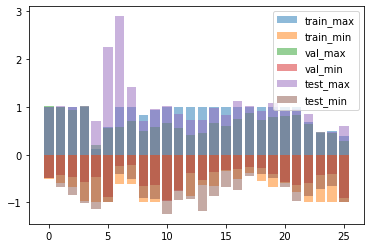

In [27]:
bars = np.arange(26)

plt.bar(bars, train_max, alpha=0.5, label="train_max")
plt.bar(bars, train_min, alpha=0.5, label="train_min")
plt.bar(bars, val_max, alpha=0.5, label="val_max")
plt.bar(bars, val_min, alpha=0.5, label="val_min")
plt.bar(bars, test_max, alpha=0.5, label="test_max")
plt.bar(bars, test_min, alpha=0.5, label="test_min")
plt.legend()

In [53]:
x = np.load(train_x[0])
y = np.load(train_y[0])[:, :26]

In [ ]:
def plot_y(y_path, scaler, title=""):
    y = np.load(y_path)[:, :26]
    y = scaler.transform(y)

    plt.bar(np.arange(26), y.min(axis=0), alpha=0.5, label="min")
    plt.bar(np.arange(26), y.max(axis=0), alpha=0.5, label="max")
    plt.bar(np.arange(26), y.mean(axis=0), alpha=0.5,label="mean")
    plt.legend()
    plt.title(title)

    plt.show()

In [57]:
def y_violin_plot(y, level=0, scaler=None):
    if scaler is None:
        y = y / y_max
    else:
        y = scaler.transform(y)
    sns.violinplot(data=y)

def y_heatmap(y, level=0, scaler=None):
    if scaler is None:
        y = y / y_max
    else:
        y = scaler.transform(y)

    
    sns.heatmap(y)

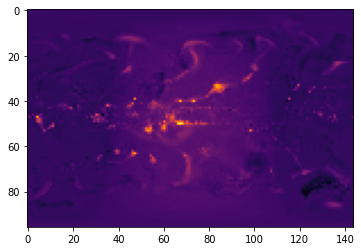

In [65]:
plt.imshow(y.reshape(24, 96 ,144, -1)[0, :, :].mean(-1), cmap="inferno")

<AxesSubplot: >

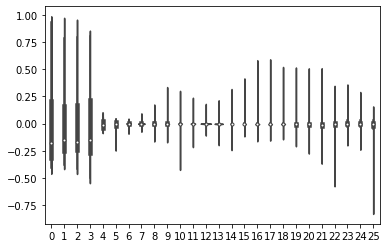

In [56]:

sns.violinplot(data=y)
# 11.9 s